In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [63]:
tf.__version__

'2.3.0'

In [64]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [66]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [67]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [68]:
drop = ['RowNumber','CustomerId','Surname']
df = df.drop(drop, axis = 1)

In [69]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [70]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [109]:
df_left, df_stayed = df.Exited.value_counts()
name = df_stayed_left.index
values = df_stayed_left.values

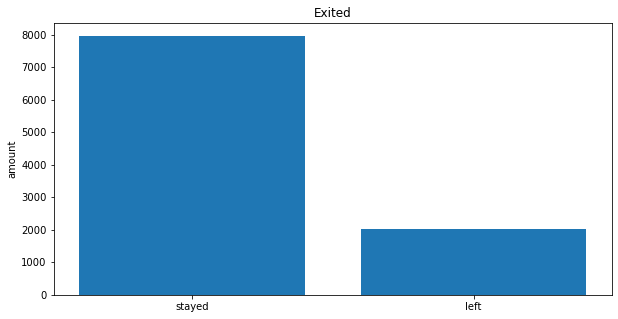

In [112]:
#imbalanced
fig = plt.figure(figsize = (10, 5))

labels = ['stayed', 'left']

plt.bar(name, values)

plt.title('Exited')
plt.ylabel('amount')
plt.xticks(name, labels)

plt.show()

In [73]:
stayed = df[df.Exited == 1].IsActiveMember
left = df[df.Exited == 0]
stayed.count()

2037

In [74]:
# Out of 2037 people who are staying, 735 people are active and 1302 people are inactive. 
active_inactive = df[df.Exited == 1].IsActiveMember
active = active_inactive[active_inactive == 1].count()
inactive = active_inactive[active_inactive == 0].count()
print(active)
print(inactive)

735
1302


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [76]:
for column in df:
    print(f'{column} : {df[column].unique()}')

CreditScore : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 

In [77]:
df_2 = pd.get_dummies(data=df, columns = ['Geography','Gender'])
df_2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [78]:
heterogenous_series = df['Age']
print(heterogenous_series.dtype)
print(pd.api.types.is_string_dtype(heterogenous_series.dtype))

int64
False


In [79]:
df_2['Age'] = df_2['Age'].astype(float)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  float64
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_France   10000 non-null  uint8  
 10  Geography_Germany  10000 non-null  uint8  
 11  Geography_Spain    10000 non-null  uint8  
 12  Gender_Female      10000 non-null  uint8  
 13  Gender_Male        10000 non-null  uint8  
dtypes: float64(3), int64(6), uint8(5)
memory usage: 752.1 KB


In [80]:
from sklearn.preprocessing import MinMaxScaler

cols_scale = ['Age','Balance','CreditScore','EstimatedSalary']

mms = MinMaxScaler()
df_2[cols_scale] = mms.fit_transform(df_2[cols_scale])

df_2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,2,0.000000,1,1,1,0.506735,1,1,0,0,1,0
1,0.516,0.310811,1,0.334031,1,0,1,0.562709,0,0,0,1,1,0
2,0.304,0.324324,8,0.636357,3,1,0,0.569654,1,1,0,0,1,0
3,0.698,0.283784,1,0.000000,2,0,0,0.469120,0,1,0,0,1,0
4,1.000,0.337838,2,0.500246,1,1,1,0.395400,0,0,0,1,1,0


In [81]:
df_2['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [82]:
df_0, df_1 = df_2.Exited.value_counts()

In [83]:
df_c_0 = df_2[df_2['Exited'] == 0]
df_c_1 = df_2[df_2['Exited'] == 1]
df_c_1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,2,0.000000,1,1,1,0.506735,1,1,0,0,1,0
2,0.304,0.324324,8,0.636357,3,1,0,0.569654,1,1,0,0,1,0
5,0.590,0.351351,8,0.453394,2,1,0,0.748797,1,0,0,1,0,1
7,0.052,0.148649,4,0.458540,4,1,0,0.596733,1,0,1,0,1,0
16,0.606,0.540541,1,0.528513,1,1,0,0.025433,1,0,1,0,0,1


In [84]:
df_c_0 = df_c_0.sample(df_1)
df_c_0.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
7850,0.276,0.243243,0,0.000000,2,1,0,0.683383,0,1,0,0,1,0
2424,0.446,0.175676,2,0.000000,2,1,1,0.459773,0,1,0,0,0,1
4227,0.566,0.243243,6,0.498730,1,0,0,0.629810,0,1,0,0,1,0
4359,0.390,0.351351,2,0.508320,1,1,0,0.541987,0,0,1,0,1,0
3993,0.692,0.297297,3,0.612357,1,1,1,0.691767,0,0,0,1,0,1


In [85]:
print(df_c_1.shape)
print(df_c_0.shape)

(2037, 14)
(2037, 14)


In [86]:
df_1_2 = pd.concat([df_c_0, df_c_1], axis = 0)
df_1_2.shape

(4074, 14)

In [87]:
x= df_1_2.drop(['Exited'], axis = 1)
y = df_1_2['Exited']

In [88]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 5, stratify = y)

In [89]:
x_train.shape

(3055, 13)

In [90]:
x_test.shape

(1019, 13)

In [91]:
y_train.shape

(3055,)

In [92]:
y_test.shape

(1019,)

In [93]:
y_test.value_counts()

1    510
0    509
Name: Exited, dtype: int64

In [94]:
#two input layers and one output layer. Activation = 'relue' because we want the input to be values. 

model = keras.Sequential([
    keras.layers.Dense(50, input_shape = (13,), activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])
# We only have 0 and 1 as output. so binary_crossentropy
model.compile(optimizer = 'Adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train, y_train, batch_size = 10, epochs = 50)

Epoch 1/50
306/306 [==============================] - 0s 435us/step - loss: 0.6720 - accuracy: 0.5925
Epoch 2/50
306/306 [==============================] - 0s 471us/step - loss: 0.6205 - accuracy: 0.6609
Epoch 3/50
306/306 [==============================] - 0s 431us/step - loss: 0.6035 - accuracy: 0.6809
Epoch 4/50
306/306 [==============================] - 0s 435us/step - loss: 0.5925 - accuracy: 0.6858
Epoch 5/50
306/306 [==============================] - 0s 425us/step - loss: 0.5818 - accuracy: 0.6995
Epoch 6/50
306/306 [==============================] - 0s 431us/step - loss: 0.5697 - accuracy: 0.7090
Epoch 7/50
306/306 [==============================] - 0s 435us/step - loss: 0.5609 - accuracy: 0.7155
Epoch 8/50
306/306 [==============================] - 0s 431us/step - loss: 0.5482 - accuracy: 0.7309
Epoch 9/50
306/306 [==============================] - 0s 438us/step - loss: 0.5390 - accuracy: 0.7394
Epoch 10/50
306/306 [==============================] - 0s 431us/step - loss: 0.529

In [95]:
model.evaluate(x_test,y_test)

32/32 [==============================] - 0s 344us/step - loss: 0.5084 - accuracy: 0.7498


[0.5084229707717896, 0.7497546672821045]

In [96]:
y_predict = model.predict(x_test)

In [97]:
#one way to create y_pred
y_pred = []
for element in y_predict:
    if element >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [98]:
#another way to create y_pred
y_pred = model.predict_classes(x_test)

In [99]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[386, 123],
       [132, 378]], dtype=int64)

Text(69.0, 0.5, 'truth')

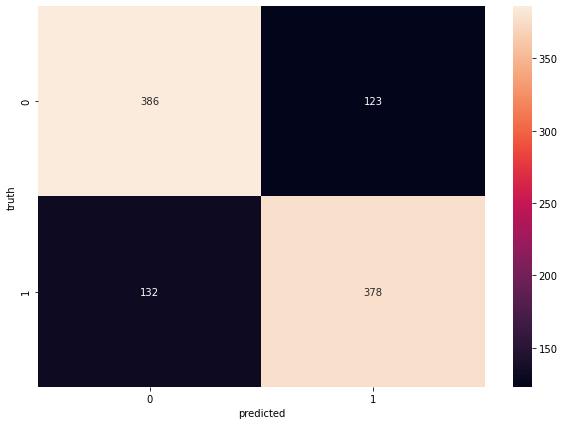

In [100]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('truth')

In [101]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.76      0.75       509
           1       0.75      0.74      0.75       510

    accuracy                           0.75      1019
   macro avg       0.75      0.75      0.75      1019
weighted avg       0.75      0.75      0.75      1019



In [102]:
#Accuracy
(1524+180)/(2000)

0.852

In [103]:
#However, we know that this this data is imbalanced so f1-score needs to be enhanced. 

In [104]:
y_test.value_counts()

1    510
0    509
Name: Exited, dtype: int64